In [1]:
from astropy.io import ascii, fits
import astropy
import pylab as plt
%matplotlib inline
from astropy import wcs
from astropy.table import Table,Column,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import pymoc
import glob
from time import sleep
import os
from astropy.nddata.utils import Cutout2D
import herschelhelp.cutouts_server as ctts

import numpy as np
import xidplus
from xidplus import moc_routines
import pickle
import xidplus.catalogue as cat

import sys
from herschelhelp_internal.utils import inMoc,flux_to_mag
from xidplus.stan_fit import SPIRE

import aplpy
import seaborn as sns
#sns.set(color_codes=True)
import pandas as pd
#sns.set_style("white")
import xidplus.posterior_maps as postmaps
from herschelhelp_internal.masterlist import merge_catalogues, nb_merge_dist_plot, specz_merge
from herschelhelp import image_plotting
import pyvo as vo
import glob

import copy

In [2]:
def read_fits(filename):
    hdulist = fits.open(filename)
    data = hdulist[1].data
    hdulist.close()
    return(data)

In [3]:
def find_posteror_source(source_num,source_id):
    #finds the pkl file corresponding to the source you give.
    # Source_num: the row number of the source you want the pkl file for
    # Source_id: the sources id
    
    if type(source_num)==int:
        source_num = [source_num]
        source_id = [source_id]
    

    source_list = []
    for n,num in enumerate(source_num):
        file_num = int(num/10)
        #print(file_num)
        #print('data/fir_v2/xidplus_run_{}/lofar_xidplus_fir_{}_rerun.pkl.pkl'.format(file_num,file_num))
        name = file_list[file_num].replace('fits','pkl.pkl')
        #print(name)
        priors,posterior = xidplus.load(name)
        #print(source_id[n])
        if source_id[n] not in priors[0].ID:
            print('source number :{}: not in opened file. Something is wrong'.format(num))
        source_list.append([priors,posterior])
        
    return(source_list)

In [4]:
lofar_orig = Table.read('data/data_release/final_cross_match_catalogue-v0.5.fits')
mips_prior = Table.read('data/data_release/xidplus_prior_cat_MIPS_rerun.fits')
pacs_prior = Table.read('data/data_release/xidplus_prior_cat_rerun_mips.fits')

In [24]:
c = SkyCoord(mips_prior['ra'],mips_prior['dec'],unit='deg')
mips_moc = pymoc.util.catalog.catalog_to_moc(c,0.15,12)
print('PACS covers: {}sq degrees'.format(mips_moc.area_sq_deg))

PACS covers: 9.797359949249689sq degrees


In [ ]:
mips_mask = inMoc()

In [5]:
lofar_orig[0]

Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ALPHA_J2000,DELTA_J2000,FLAG_DEEP,flag_clean,ID_OPTICAL,ID_SPITZER,ID,FLAG_OVERLAP,EBV,FUV_flux_corr,FUV_fluxerr_corr,FUV_mag_corr,FUV_magerr_corr,NUV_flux_corr,NUV_fluxerr_corr,NUV_mag_corr,NUV_magerr_corr,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,Bw_flux_corr,Bw_fluxerr_corr,Bw_mag_corr,Bw_magerr_corr,R_flux_corr,R_fluxerr_corr,R_mag_corr,R_magerr_corr,I_flux_corr,I_fluxerr_corr,I_mag_corr,I_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,z_Subaru_flux_corr,z_Subaru_fluxerr_corr,z_Subaru_mag_corr,z_Subaru_magerr_corr,y_flux_corr,y_fluxerr_corr,y_mag_corr,y_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,H_flux_corr,H_fluxerr_corr,H_mag_corr,H_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,Ks_flux_corr,Ks_fluxerr_corr,Ks_mag_corr,Ks_magerr_corr,ch1_flux_corr,ch1_fluxerr_corr,ch1_mag_corr,ch1_magerr_corr,ch2_flux_corr,ch2_fluxerr_corr,ch2_mag_corr,ch2_magerr_corr,ch3_flux_corr,ch3_fluxerr_corr,ch3_mag_corr,ch3_magerr_corr,ch4_flux_corr,ch4_fluxerr_corr,ch4_mag_corr,ch4_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,CLASS_STAR,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,Z_SOURCE,Z_QUAL,RA_ZSPEC,DEC_ZSPEC,REL,OBJID,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,AGN_ZSPEC,XrayAGN,XrayFlux_0.5-2,XrayHardness,hp_idx_11,hp_depth_cluster,tot_corr_z_Subaru,tot_corr_err_z_Subaru,tot_corr_z,tot_corr_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,SFR_median,SFR_l68,SFR_u68,Nfilts,u_rest,Bw_rest,R_rest,I_rest,z_rest,z_Subaru_rest,y_rest,J_rest,H_rest,K_rest,Ks_rest,ch1_rest,ch2_rest,ch3_rest,ch4_rest
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,float64,float64,float64,int64,int64,int64,float64,int64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

## Processing MIPS output

In [6]:
file_list = glob.glob('data/fir/MIPS/*/lofar_xidplus*.fits')
num_not = np.arange(428,860,1)

lofar_mips_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    

    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=100:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_mips_table = vstack([lofar_mips_table,new_table])
data_rerun_table = lofar_mips_table

0
data/fir/MIPS/xidplus_run_38/lofar_xidplus_fir_38_rerun.fits
length of table is: 48


In [14]:
lofar_mips_table[0]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
ILTJ143113.16+330522.4,217.8044707,33.0897377,75.85011,128.93367,22.208841,28.613304,5.024722e-06,0.99974245,3975.3574,0.0


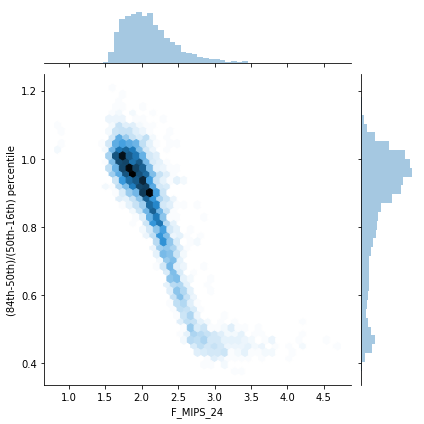

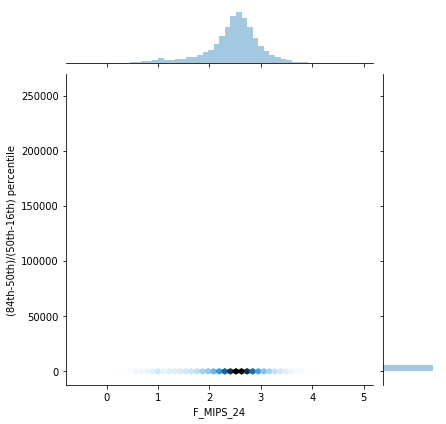

In [15]:
skew=(lofar_mips_table['FErr_MIPS_24_u']-lofar_mips_table['F_MIPS_24'])/(lofar_mips_table['F_MIPS_24']-lofar_mips_table['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_mips_table['F_MIPS_24']),y=skew, kind='hex')

skew=(lofar_orig['FErr_MIPS_24_u']-lofar_orig['F_MIPS_24'])/(lofar_orig['F_MIPS_24']-lofar_orig['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_MIPS_24']),y=skew, kind='hex')

In [18]:
lofar_mips_table.add_column(Column(np.zeros(len(data_rerun_table), dtype=bool),name='flag_mips_24'))



In [19]:
ind_SERVS_250=(lofar_mips_table['Pval_res_24']>0.5) | (lofar_mips_table['F_MIPS_24'] <20)
print(ind_SERVS_250.sum(),len(lofar_mips_table))

lofar_mips_table['flag_mips_24'][ind_SERVS_250]=True

1360 3748


In [20]:
rerun_col = Column(np.ones(len(lofar_mips_table)),name='XID+_rerun_mips',dtype='bool')
lofar_mips_table.add_column(rerun_col)

In [21]:
lofar_mips_table[0]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_MIPS_24,flag_mips_24,XID+_rerun_mips
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool
ILTJ143113.16+330522.4,217.8044707,33.0897377,75.85011,128.93367,22.208841,28.613304,5.024722e-06,0.99974245,3975.3574,0.0,False,False,True


### Plot mips sources

In [29]:
#read in mips image and create wcs
imfolder='../../../../../HELP/dmu_products/dmu17/dmu17_HELP_Legacy_maps//Bootes/data/'

pswfits=imfolder+'wp4_bootes_mips24_map_v1.0.fits.gz'#SPIRE 250 map

MIPS_Map = fits.open(pswfits)

#-----250-------------
hdulist = fits.open(pswfits)
im24phdu=hdulist[0].header
im24hdu=hdulist[1].header

im24=hdulist[1].data*1.0E3 #convert to mJy
nim24=hdulist[2].data*1.0E3 #convert to mJy
w_24 = wcs.WCS(hdulist[1].header)
hdulist.close()

In [30]:
fname = 'data/data_release/radio_image.fits'
hdulist = fits.open(fname)
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0]
hdulist.close()

In [31]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/120,
              'use_redshift':[False,False,False,False]}

contours are at [-2.20998121e-04 -2.82375848e-05  1.64522951e-04  3.57283487e-04
  5.50044023e-04  7.42804559e-04  9.35565095e-04]
plotting 1 sources
plotting 1 sources
plotting 1 sources


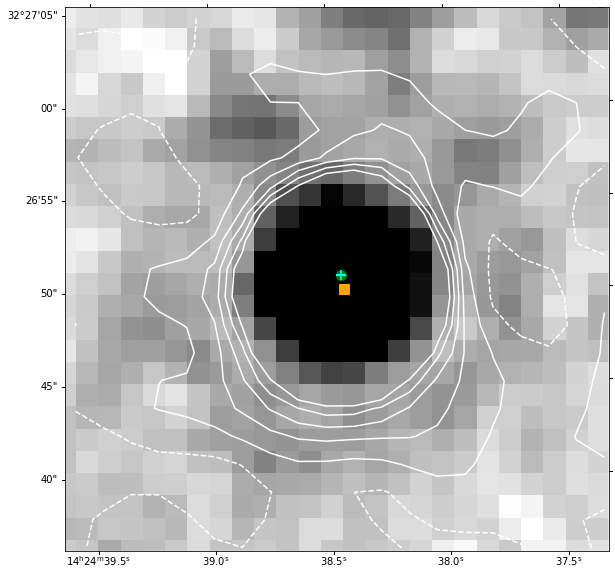

In [32]:
mask = (lofar_mips_table['RA']<216.3) & (lofar_mips_table['Dec']<32.5)
ra   = lofar_mips_table['RA'][mask][0]
dec = lofar_mips_table['Dec'][mask][0]


image_plotting.plot_figure(im24,[mips_prior,lofar_mips_table,lofar_orig],w_24,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

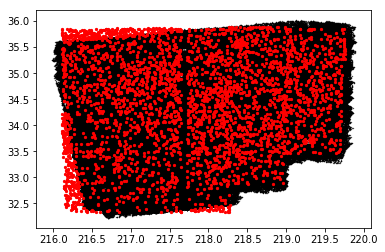

In [21]:
x = mips_prior['ra']
y = mips_prior['dec']
plt.scatter(x,y,c='black',s=0.1)

ras = lofar_mips_table['RA']#[~ind_SERVS_160]
decs = lofar_mips_table['Dec']#[~ind_SERVS_160]
plt.scatter(ras,decs,c='red',s=5)

#ras = lofar_pacs_table['RA'][~ind_SERVS_160]
#decs = lofar_pacs_table['Dec'][~ind_SERVS_160]
#plt.scatter(ras,decs,c='blue',s=50)

In [25]:
mask = inMoc(lofar_mips_table['RA'],lofar_mips_table['Dec'],mips_moc)
print(np.sum(mask)/len(mask))

1.0


In [26]:
np.sum(mask)

3748

## Processing PACS output

In [10]:
file_list = glob.glob('data/fir/PACS/*/lofar_xidplus_fir*.fits')
#num_not = np.arange(428,860,1)

lofar_pacs_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)
    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=20:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_pacs_table = vstack([lofar_pacs_table,new_table])
data_rerun_table = lofar_pacs_table

0
50
data/fir/PACS/xidplus_run_236/lofar_xidplus_fir_236_rerun.fits
length of table is: 3
100
150
200


In [11]:
lofar_pacs_table[0]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
ILTJ142922.65+330757.5,217.344398,33.132768,22.993334,38.52961,7.3073726,16.137163,27.26522,5.0821934,5.6109304,3.9936469,8.662383,4.293219,0.9986752,0.9985747,4368.2456,5081.357,1.0,1.0


In [12]:
mask = inMoc(lofar_pacs_table['RA'],lofar_pacs_table['Dec'],mips_moc)
print(np.sum(mask)/len(mask))

1.0


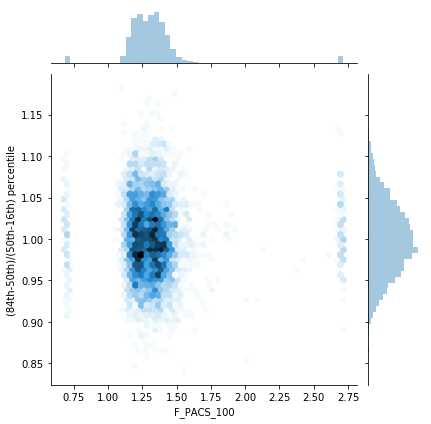

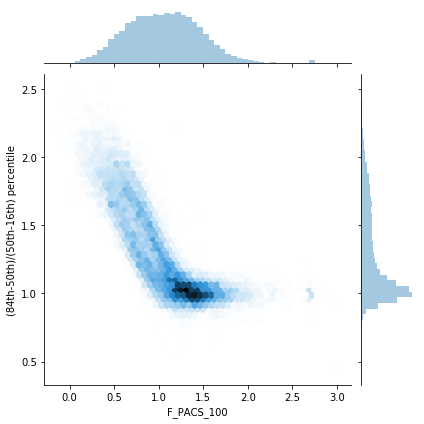

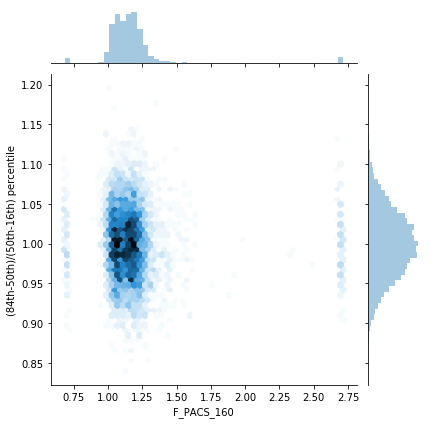

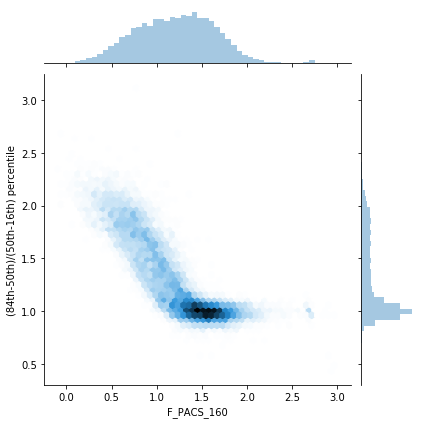

In [13]:
skew=(lofar_pacs_table['FErr_PACS_100_u']-lofar_pacs_table['F_PACS_100'])/(lofar_pacs_table['F_PACS_100']-lofar_pacs_table['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_pacs_table['F_PACS_100']),y=skew, kind='hex')

skew=(lofar_orig['FErr_PACS_100_u']-lofar_orig['F_PACS_100'])/(lofar_orig['F_PACS_100']-lofar_orig['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_PACS_100']),y=skew, kind='hex')

skew=(lofar_pacs_table['FErr_PACS_160_u']-lofar_pacs_table['F_PACS_160'])/(lofar_pacs_table['F_PACS_160']-lofar_pacs_table['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_pacs_table['F_PACS_160']),y=skew, kind='hex')

skew=(lofar_orig['FErr_PACS_160_u']-lofar_orig['F_PACS_160'])/(lofar_orig['F_PACS_160']-lofar_orig['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_PACS_160']),y=skew, kind='hex')

In [14]:
lofar_pacs_table.add_column(Column(np.zeros(len(lofar_pacs_table), dtype=bool),name='flag_pacs_100'))
lofar_pacs_table.add_column(Column(np.zeros(len(lofar_pacs_table), dtype=bool),name='flag_pacs_160'))

In [15]:
ind_SERVS_100=(lofar_pacs_table['Pval_res_100']>0.5) | (lofar_pacs_table['F_PACS_100'] < 12.5)
ind_SERVS_160=(lofar_pacs_table['Pval_res_160']>0.5) | (lofar_pacs_table['F_PACS_160'] < 17.5)
print(ind_SERVS_100.sum(),ind_SERVS_160.sum(),len(lofar_pacs_table))

lofar_pacs_table['flag_pacs_100'][ind_SERVS_100]=True
lofar_pacs_table['flag_pacs_160'][ind_SERVS_160]=True

4588 4588 4683


In [30]:
rerun_col = Column(np.ones(len(lofar_pacs_table)),name='XID+_rerun_pacs',dtype='bool')
lofar_pacs_table.add_column(rerun_col)

In [73]:
imfolder='../../../../../HELP/dmu_products/dmu18/dmu18_HELP-PACS-maps/data/'

im100fits=imfolder + 'Bootes_PACS100_v0.9.fits'#PACS 100 map
im160fits=imfolder + 'Bootes_PACS160_v0.9.fits'#PACS 160 map

#-----100-------------
hdulist = fits.open(im100fits)
im100phdu=hdulist[0].header
im100hdu=hdulist[1].header
im100=hdulist[1].data
w_100 = wcs.WCS(hdulist[1].header)
pixsize100=3600.0*np.abs(hdulist[1].header['CDELT1']) #pixel size (in arcseconds)

nim100=hdulist[2].data
hdulist.close()

#-----160-------------
hdulist = fits.open(im160fits)
im160phdu=hdulist[0].header
im160hdu=hdulist[1].header

im160=hdulist[1].data #convert to mJy
w_160 = wcs.WCS(hdulist[1].header)
pixsize160=3600.0*np.abs(hdulist[1].header['CDELT1']) #pixel size (in arcseconds)

nim160=hdulist[2].data
hdulist.close()

In [92]:
im160.shape

(4577, 4455)

In [94]:
w_160.all_pix2world(4577,4455,0)

[array(215.42830024), array(36.16434041)]

In [74]:
plot_params = {'marker':['o','+','+','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False]}

In [96]:
ra = 217.85
dec = 34.38

ra = lofar_pacs_table['RA'][~ind_SERVS_160][3]
dec = lofar_pacs_table['Dec'][~ind_SERVS_160][3]
print(ra,dec)

image_plotting.plot_figure(im160,[pacs_prior,lofar_pacs_table,lofar_orig],w_160,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

216.2956334 32.4010061


NoOverlapError: Arrays do not overlap.

<Figure size 720x720 with 0 Axes>

In [107]:
mask = lofar_pacs_table['F_PACS_160']>17.5
ras = lofar_pacs_table['RA'][~ind_SERVS_160]
decs = lofar_pacs_table['Dec'][~ind_SERVS_160]

#ra = 244.01967769676352
#dec = 55.61836714885293
for n in range(len(ras)):
    try:
        image_plotting.plot_figure(im160,[pacs_prior,lofar_pacs_table,lofar_orig],w_160,ras[n],decs[n],plot_params,contour_data=[radim_data,radim_wcs])
    except:()
plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

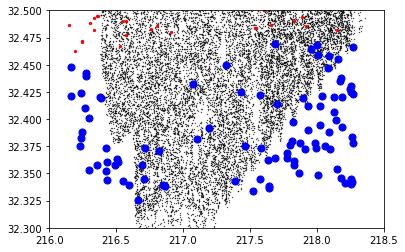

In [20]:
x = pacs_prior['ra']
y = pacs_prior['dec']
plt.scatter(x,y,c='black',s=0.1)

ras = lofar_pacs_table['RA']#[~ind_SERVS_160]
decs = lofar_pacs_table['Dec']#[~ind_SERVS_160]
plt.scatter(ras,decs,c='red',s=5)

ras = lofar_pacs_table['RA'][~ind_SERVS_160]
decs = lofar_pacs_table['Dec'][~ind_SERVS_160]
plt.scatter(ras,decs,c='blue',s=50)

plt.xlim(216,218.5)
plt.ylim(32.3,32.5)
plt.show()

In [ ]:
ax

## Processing SPIRE output

In [61]:
file_list = glob.glob('data/fir/SPIRE/*/lofar_xidplus_fir*.fits')

lofar_spire_table = Table.read(file_list[0])
for i,filename in enumerate(file_list[1:]):
    #print(filename)
    if i%50==0:
        print(i)

    
    #print(filename)
    new_table = Table.read(filename,memmap=False)
    if len(new_table)!=20:
        print(filename)
        print('length of table is: {}'.format(len(new_table)))
    lofar_spire_table = vstack([lofar_spire_table,new_table])
data_rerun_table = lofar_spire_table

0
50
data/fir/SPIRE/xidplus_run_236/lofar_xidplus_fir_236.fits
length of table is: 3
100
150
200


In [62]:
lofar_spire_table

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
ILTJ142922.65+330757.5,217.344398,33.132768,2.2884002,5.1263633,0.5876314,3.1125546,6.974513,0.86671054,2.2315803,5.200044,0.55100584,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.99907297,0.99970216,0.9993674,2661.8884,3521.5505,3125.2954,0.0,0.0,0.074
ILTJ142922.70+325939.1,217.3448868,32.9943503,2.498102,5.419995,0.74209625,3.448098,7.350877,1.1265541,2.557772,5.9607067,0.61688113,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.9998603,0.99980885,0.9992591,2454.0127,3191.289,2809.9353,0.0,0.008,0.064
ILTJ142923.41+352849.8,217.348513,35.48093,2.196966,4.458127,0.6512287,1.3358452,3.0832965,0.3416756,1.0819435,2.766157,0.24487337,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,1.0000014,0.9993353,0.99984086,3232.411,3321.8457,2927.2388,0.0,0.004,0.149
ILTJ142923.68+350600.7,217.348423,35.100373,5.4074306,9.7783375,1.7884928,4.400666,8.876588,1.3056822,2.5177236,5.913674,0.63673115,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.99945724,0.9988077,0.99874943,1975.3074,3151.3079,2481.4097,0.13,0.23,0.893
ILTJ142923.72+342026.2,217.348116,34.33978,3.4562857,5.86892,1.4040922,2.7198021,5.479329,0.79002154,1.9063889,4.445718,0.5017993,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.99933445,0.99999887,0.99989,2006.0532,3045.049,2204.1204,0.025,0.63,0.992
ILTJ142923.76+343150.4,217.349017,34.530739,5.4342265,11.355575,1.6104822,7.9974027,18.265272,2.4450967,6.7976246,15.203299,2.060564,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.99935174,1.0017208,0.99900156,1997.159,2738.6084,1466.9293,0.3,0.57,0.991
ILTJ142923.85+333013.3,217.3491947,33.5037644,8.62706,16.686642,2.7316148,3.5858989,8.237906,0.9790867,1.3784996,3.4944742,0.36265713,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,1.0008395,0.99990606,0.9984897,2412.339,3334.8975,2918.5054,0.005,0.628,0.997
ILTJ142923.95+350732.5,217.3496504,35.1257094,32.66855,35.45238,29.88133,25.274244,29.947952,19.33306,5.8991585,11.862767,1.7524732,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,1.0005195,0.9990376,1.000826,2450.5662,2028.4619,1774.2932,0.002,0.188,0.874


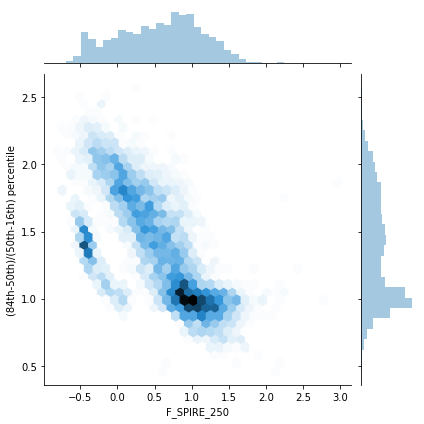

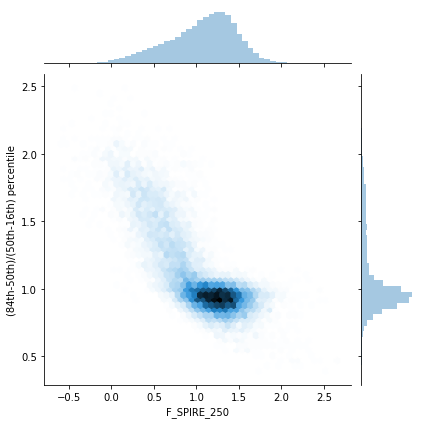

In [63]:
skew=(lofar_spire_table['FErr_SPIRE_250_u']-lofar_spire_table['F_SPIRE_250'])/(lofar_spire_table['F_SPIRE_250']-lofar_spire_table['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_250']),y=skew, kind='hex')

skew=(lofar_orig['FErr_SPIRE_250_u']-lofar_orig['F_SPIRE_250'])/(lofar_orig['F_SPIRE_250']-lofar_orig['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_orig['F_SPIRE_250']),y=skew, kind='hex')


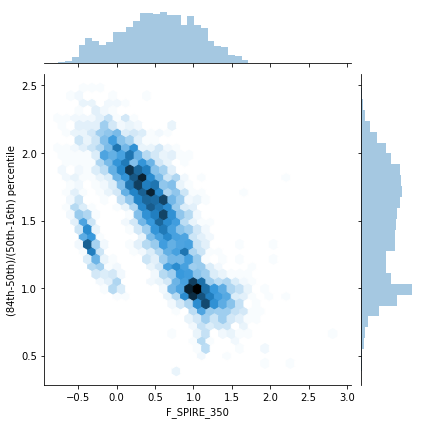

In [64]:
skew=(lofar_spire_table['FErr_SPIRE_350_u']-lofar_spire_table['F_SPIRE_350'])/(lofar_spire_table['F_SPIRE_350']-lofar_spire_table['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_350']),y=skew, kind='hex')

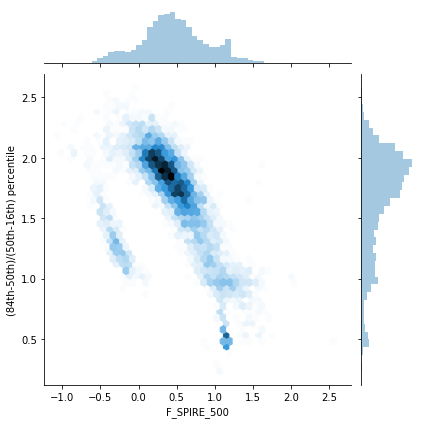

In [65]:
skew=(lofar_spire_table['FErr_SPIRE_500_u']-lofar_spire_table['F_SPIRE_500'])/(lofar_spire_table['F_SPIRE_500']-lofar_spire_table['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(lofar_spire_table['F_SPIRE_500']),y=skew, kind='hex')

In [66]:
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_250'))
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_350'))
lofar_spire_table.add_column(Column(np.zeros(len(lofar_spire_table), dtype=bool),name='flag_spire_500'))

In [67]:
ind_SERVS_250=(lofar_spire_table['Pval_res_250']>0.5) | (lofar_spire_table['F_SPIRE_250'] < 4)
ind_SERVS_350=(lofar_spire_table['Pval_res_350']>0.5) | (lofar_spire_table['F_SPIRE_350'] < 4)
ind_SERVS_500=(lofar_spire_table['Pval_res_500']>0.5) | (lofar_spire_table['F_SPIRE_500'] < 4)

print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(lofar_spire_table))

lofar_spire_table['flag_spire_250'][ind_SERVS_250]=True
lofar_spire_table['flag_spire_350'][ind_SERVS_350]=True
lofar_spire_table['flag_spire_500'][ind_SERVS_500]=True

2685 3161 4026 4703


In [68]:
np.sum(lofar_orig['Pval_res_250']>0.5)

461

In [69]:
rerun_col = Column(np.ones(len(lofar_spire_table)),name='XID+_rerun_SPIRE',dtype='bool')
lofar_spire_table.add_column(rerun_col)

In [70]:
lofar_spire_table.rename_column('HELP_ID','help_id')

In [71]:
lofar_spire_table[0]

help_id,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,XID+_rerun_SPIRE
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,bool
ILTJ142922.65+330757.5,217.344398,33.132768,2.2884002,5.1263633,0.5876314,3.1125546,6.974513,0.86671054,2.2315803,5.200044,0.55100584,-4.731717,-7.5404167,-15.062516,2.8346136,3.74478,5.9275064,0.99907297,0.99970216,0.9993674,2661.8884,3521.5505,3125.2954,0.0,0.0,0.074,True,True,True,True


## Plot SPIRE Sources

In [77]:
imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'

pswfits=imfolder+'Bootes_SPIRE250_v1.0.fits'#SPIRE 250 map
hdulist = fits.open(pswfits)
im250phdu=hdulist[0].header
im250hdu=hdulist['image'].header

im250=hdulist['image'].data*1.0E3 #convert to mJy
w_250 = wcs.WCS(hdulist['image'].header)
hdulist.close()

imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
pmwfits=imfolder+'Bootes_SPIRE350_v1.0.fits'#SPIRE 350 map
hdulist = fits.open(pswfits)
im350phdu=hdulist[0].header
im350hdu=hdulist['image'].header

im350=hdulist['image'].data*1.0E3 #convert to mJy
w_350 = wcs.WCS(hdulist['image'].header)
hdulist.close()

imfolder='../../../../../HELP/dmu_products/dmu19/dmu19_HELP-SPIRE-maps/data/'
plwfits=imfolder+'Bootes_SPIRE500_v1.0.fits'#SPIRE 500 map
hdulist = fits.open(pswfits)
im500phdu=hdulist[0].header
im500hdu=hdulist['image'].header

im500=hdulist['image'].data*1.0E3 #convert to mJy
w_500 = wcs.WCS(hdulist['image'].header)
hdulist.close()

In [78]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['green','cyan','orange'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False]}

contours are at [-9.52875260e-05 -4.37214981e-05  7.84452971e-06  5.94105575e-05
  1.10976585e-04  1.62542613e-04  2.14108641e-04]
plotting 10 sources
plotting 1 sources
plotting 2 sources


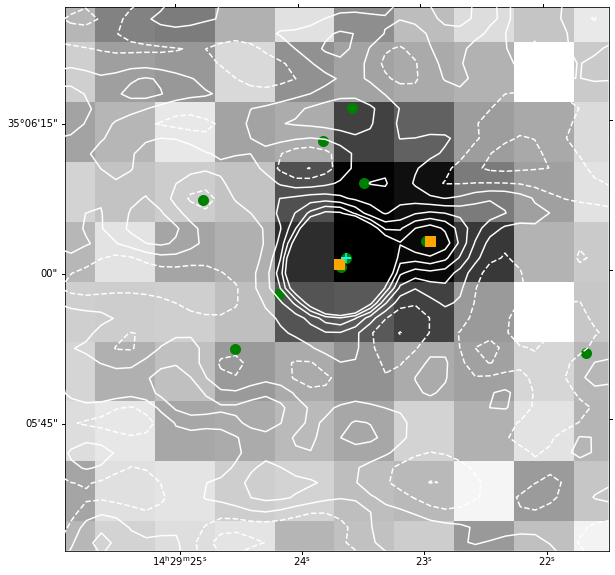

contours are at [-9.52875260e-05 -4.37214981e-05  7.84452971e-06  5.94105575e-05
  1.10976585e-04  1.62542613e-04  2.14108641e-04]
plotting 10 sources
plotting 1 sources
plotting 2 sources


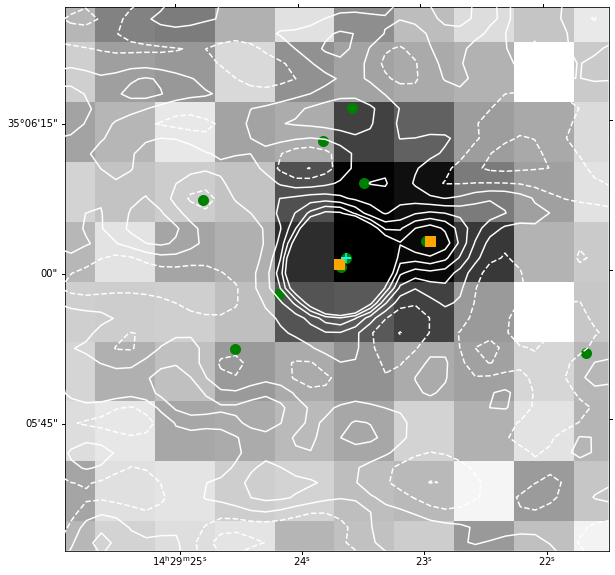

contours are at [-9.52875260e-05 -4.37214981e-05  7.84452971e-06  5.94105575e-05
  1.10976585e-04  1.62542613e-04  2.14108641e-04]
plotting 10 sources
plotting 1 sources
plotting 2 sources


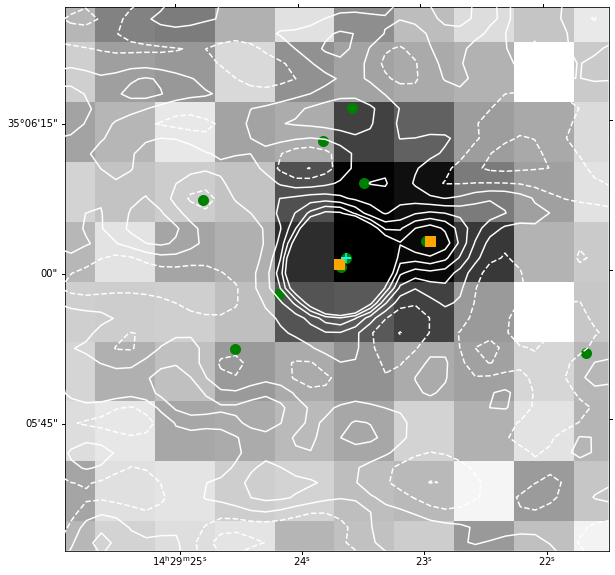

In [82]:
ra = lofar_spire_table['RA'][~ind_SERVS_250][0]
dec = lofar_spire_table['Dec'][~ind_SERVS_250][0]
image_plotting.plot_figure(im250,[pacs_prior,lofar_spire_table,lofar_orig],w_250,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])
image_plotting.plot_figure(im350,[pacs_prior,lofar_spire_table,lofar_orig],w_350,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])
image_plotting.plot_figure(im500,[pacs_prior,lofar_spire_table,lofar_orig],w_500,ra,dec,plot_params,contour_data=[radim_data,radim_wcs])

## Merge the MIPS, PACS and SPIRE catalogues

In [85]:
MIPS_x_PACS = join(lofar_mips_table,lofar_pacs_table,keys='help_id',join_type='outer')
fir_table = join(MIPS_x_PACS,lofar_spire_table,keys='help_id',join_type='outer')

In [74]:
for name in fir_table.colnames:
    
    if ('RA' in name) or ('Dec' in name):
        print(name)
        fir_table.remove_column(name)
fir_table.rename_column('help_id','Source_Name')

RA_1
Dec_1
RA_2
Dec_2
RA
Dec


In [75]:
fir_table[0]

Source_Name,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_MIPS_24,XID+_rerun_mips,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,XID+_rerun_pacs,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_SPIRE_250,flag_SPIRE_350,flag_SPIRE_500,XID+_rerun_SPIRE
,muJy,muJy,muJy,MJy / sr,MJy / sr,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,,,,
bytes27,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,bool,bool
ILTJ102955.65+580259.6,7.5941215,12.568286,2.53527,0.0015704,4.862012e-06,0.9987956,3321.831,0.0,True,True,19.978607,26.750326,13.41858,21.442863,25.685009,14.63285,6.209543,3.1540887,7.392655,2.9802322,0.9988557,0.99885386,3113.115,2428.529,0.994,0.087,True,False,True,7.007651,9.644292,4.2049346,3.740409,6.3435483,1.6302118,0.44857028,1.1472315,0.124486774,0.57328004,0.45005608,0.6555992,0.5713516,0.8201086,0.6803712,1.000855,1.0006844,0.9989946,1857.553,2799.566,1655.5464,0.285,0.955,0.048,False,True,True,True


In [76]:
fir_table_v01 = fir_table.copy()

In [77]:
all_fir_table = join(fir_table,fir_table_v01,join_type='outer',keys='Source_Name')

In [78]:
mask = [ids in lofar_orig['Source_Name'] for ids in all_fir_table['Source_Name']]
new_fir_table = all_fir_table[mask]

In [79]:
for name in fir_table.colnames:
    if ('Source' in name) or ('RA' in name) or ('Dec' in name):
        continue

    colname = name+'_1'
    mask = new_fir_table[colname].mask
    new_fir_table[colname][mask] = new_fir_table[name+'_2'][mask]
    new_fir_table.rename_column(colname,name)
    new_fir_table.remove_column(name+'_2')

In [80]:
new_fir_table.colnames

['Source_Name',
 'F_MIPS_24',
 'FErr_MIPS_24_u',
 'FErr_MIPS_24_l',
 'Bkg_MIPS_24',
 'Sig_conf_MIPS_24',
 'Rhat_MIPS_24',
 'n_eff_MIPS_24',
 'Pval_res_24',
 'flag_MIPS_24',
 'XID+_rerun_mips',
 'F_PACS_100',
 'FErr_PACS_100_u',
 'FErr_PACS_100_l',
 'F_PACS_160',
 'FErr_PACS_160_u',
 'FErr_PACS_160_l',
 'Bkg_PACS_100',
 'Bkg_PACS_160',
 'Sig_conf_PACS_100',
 'Sig_conf_PACS_160',
 'Rhat_PACS_100',
 'Rhat_PACS_160',
 'n_eff_PACS_100',
 'n_eff_PACS_160',
 'Pval_res_100',
 'Pval_res_160',
 'flag_PACS_100',
 'flag_PACS_160',
 'XID+_rerun_pacs',
 'F_SPIRE_250',
 'FErr_SPIRE_250_u',
 'FErr_SPIRE_250_l',
 'F_SPIRE_350',
 'FErr_SPIRE_350_u',
 'FErr_SPIRE_350_l',
 'F_SPIRE_500',
 'FErr_SPIRE_500_u',
 'FErr_SPIRE_500_l',
 'Bkg_SPIRE_250',
 'Bkg_SPIRE_350',
 'Bkg_SPIRE_500',
 'Sig_conf_SPIRE_250',
 'Sig_conf_SPIRE_350',
 'Sig_conf_SPIRE_500',
 'Rhat_SPIRE_250',
 'Rhat_SPIRE_350',
 'Rhat_SPIRE_500',
 'n_eff_SPIRE_250',
 'n_eff_SPIRE_500',
 'n_eff_SPIRE_350',
 'Pval_res_250',
 'Pval_res_350',
 'Pval_

In [81]:
lofar_fir = join(lofar_orig,new_fir_table,keys='Source_Name',join_type='outer')

In [82]:
lofar_fir[0]

Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,Isl_rms,FLAG_WORKFLOW,Prefilter,NoID,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,ID,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,ID_OPTICAL,ID_SPITZER,FLAG_OVERLAP,EBV,u_flux_corr,u_fluxerr_corr,u_mag_corr,u_magerr_corr,g_flux_corr,g_fluxerr_corr,g_mag_corr,g_magerr_corr,r_flux_corr,r_fluxerr_corr,r_mag_corr,r_magerr_corr,z_flux_corr,z_fluxerr_corr,z_mag_corr,z_magerr_corr,g_rcs_flux_corr,g_rcs_fluxerr_corr,g_rcs_mag_corr,g_rcs_magerr_corr,r_rcs_flux_corr,r_rcs_fluxerr_corr,r_rcs_mag_corr,r_rcs_magerr_corr,i_rcs_flux_corr,i_rcs_fluxerr_corr,i_rcs_mag_corr,i_rcs_magerr_corr,z_rcs_flux_corr,z_rcs_fluxerr_corr,z_rcs_mag_corr,z_rcs_magerr_corr,J_flux_corr,J_fluxerr_corr,J_mag_corr,J_magerr_corr,K_flux_corr,K_fluxerr_corr,K_mag_corr,K_magerr_corr,ch1_swire_flux_corr,ch1_swire_fluxerr_corr,ch1_swire_mag_corr,ch1_swire_magerr_corr,ch2_swire_flux_corr,ch2_swire_fluxerr_corr,ch2_swire_mag_corr,ch2_swire_magerr_corr,ch3_swire_flux_corr,ch3_swire_fluxerr_corr,ch3_swire_mag_corr,ch3_swire_magerr_corr,ch4_swire_flux_corr,ch4_swire_fluxerr_corr,ch4_swire_mag_corr,ch4_swire_magerr_corr,ch1_servs_flux_corr,ch1_servs_fluxerr_corr,ch1_servs_mag_corr,ch1_servs_magerr_corr,ch2_servs_flux_corr,ch2_servs_fluxerr_corr,ch2_servs_mag_corr,ch2_servs_magerr_corr,Separation,help_id,RA_HELP,DEC_HELP,CLASS_STAR,F_MIPS_24_1,FErr_MIPS_24_u_1,FErr_MIPS_24_l_1,Bkg_MIPS_24_1,Sig_conf_MIPS_24_1,Rhat_MIPS_24_1,n_eff_MIPS_24_1,Pval_res_24_1,flag_mips_24,F_PACS_100_1,FErr_PACS_100_u_1,FErr_PACS_100_l_1,F_PACS_160_1,FErr_PACS_160_u_1,FErr_PACS_160_l_1,Bkg_PACS_100_1,Bkg_PACS_160_1,Sig_conf_PACS_100_1,Sig_conf_PACS_160_1,Rhat_PACS_100_1,Rhat_PACS_160_1,n_eff_PACS_100_1,n_eff_PACS_160_1,Pval_res_100_1,Pval_res_160_1,flag_PACS_100_1,flag_PACS_160_1,F_SPIRE_250_1,FErr_SPIRE_250_u_1,FErr_SPIRE_250_l_1,F_SPIRE_350_1,FErr_SPIRE_350_u_1,FErr_SPIRE_350_l_1,F_SPIRE_500_1,FErr_SPIRE_500_u_1,FErr_SPIRE_500_l_1,Bkg_SPIRE_250_1,Bkg_SPIRE_350_1,Bkg_SPIRE_500_1,Sig_conf_SPIRE_250_1,Sig_conf_SPIRE_350_1,Sig_conf_SPIRE_500_1,Rhat_SPIRE_250_1,Rhat_SPIRE_350_1,Rhat_SPIRE_500_1,n_eff_SPIRE_250_1,n_eff_SPIRE_500_1,n_eff_SPIRE_350_1,Pval_res_250_1,Pval_res_350_1,Pval_res_500_1,flag_spire_250,flag_spire_350,flag_spire_500,Z_BEST,Z_BEST_SOURCE,Z_SPEC,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,AGN,optAGN,IRAGN,XrayAGN,hp_idx_11,hp_depth_cluster,tot_corr_g,tot_corr_err_g,tot_corr_r,tot_corr_err_r,tot_corr_z,tot_corr_err_z,zmodel,chi_best,Mass_median,Mass_l68,Mass_u68,SFR_median,SFR_l68,SFR_u68,Nfilts,u_rest,g_rest,r_rest,z_rest,g_rcs_rest,r_rcs_rest,i_rcs_rest,z_rcs_rest,J_rest,K_rest,ch1_servs_rest,ch2_servs_rest,ch1_swire_rest,ch2_swire_rest,ch3_swire_rest,ch4_swire_rest,F_MIPS_24_2,FErr_MIPS_24_u_2,FErr_MIPS_24_l_2,Bkg_MIPS_24_2,Sig_conf_MIPS_24_2,Rhat_MIPS_24_2,n_eff_MIPS_24_2,Pval_res_24_2,flag_MIPS_24,XID+_rerun_mips,F_PACS_100_2,FErr_PACS_100_u_2,FErr_PACS_100_l_2,F_PACS_160_2,FErr_PACS_160_u_2,FErr_PACS_160_l_2,Bkg_PACS_100_2,Bkg_PACS_160_2,Sig_conf_PACS_100_2,Sig_conf_PACS_160_2,Rhat_PACS_100_2,Rhat_PACS_160_2,n_eff_PACS_100_2,n_eff_PACS_160_2,Pval_res_100_2,Pval_res_160_2,flag_PACS_100_2,flag_PACS_160_2,XID+_rerun_pacs,F_SPIRE_250_2,FErr_SPIRE_250_u_2,FErr_SPIRE_250_l_2,F_SPIRE_350_2,FErr_SPIRE_350_u_2,FErr_SPIRE_350_l_2,F_SPIRE_500_2,FErr_SPIRE_500_u_2,FErr_SPIRE_500_l_2,Bkg_SPIRE_250_2,Bkg_SPIRE_350_2,Bkg_SPIRE_500_2,Sig_conf_SPIRE_250_2,Sig_conf_SPIRE_350_2,Sig_conf_SPIRE_500_2,Rhat_SPIRE_250_2,Rhat_SPIRE_350_2,Rhat_SPIRE_500_2,n_eff_SPIRE_250_2,n_eff_SPIRE_500_2,n_eff_SPIRE_350_2,Pval_res_250_2,Pval_res_350_2,Pval_res_500_2,flag_SPIRE_250,flag_SPIRE_350,flag_SPIRE_500,XID+_rerun_SPIRE
,,,,,,,,,,,,,,,

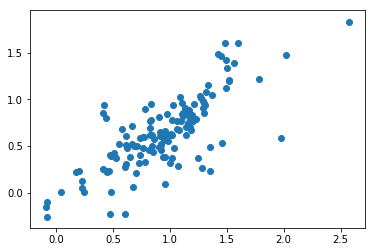

In [98]:
new_mask = ~lofar_fir['F_SPIRE_250_2'].mask
mask = (~np.isnan(lofar_fir['F_SPIRE_250_1'][new_mask])) & (~np.isnan(lofar_fir['F_SPIRE_250_2'][new_mask]))

x = np.log10(lofar_fir['F_SPIRE_250_1'][new_mask][mask])
y = np.log10(lofar_fir['F_SPIRE_250_2'][new_mask][mask])
plt.scatter(x,y)

In [99]:
Table.write(new_fir_table,'data/data_release/XID+_lofar_ELAIS-N1_v0.5.fits')

In [125]:
for name in fir_table.colnames:

    if 'Source' in name:
        continue
    if 'rerun' in name:
        continue
    mask = np.isnan(lofar_fir[name+'_1'])
    lofar_fir[name+'_1'][mask] = lofar_fir[name+'_2'][mask]
    lofar_fir.remove_column(name+'_2')

for name in lofar_fir.colnames:
    if name[-2:]=='_1':
        lofar_fir.rename_column(name,name.replace('_1',''))
    if name[-2:]=='_2':
        lofar_fir.rename_column(name,name.replace('_2',''))

KeyError: 'flag_MIPS_24_1'

In [84]:
test = 'adadadtt'
test[-2:]

'tt'

In [254]:
Table.write(lofar_new_ids,'data/data_release/XID+_lofar_ELAIS-N1.fits',overwrite=True)

### Running checks on the FIR fluxes to see how they compare with the crossmatched fluxes already in the LOFAR catalogue

In [16]:
lofar_cat = Table.read('data/data_release/final_cross_match_catalogue-v0.1.fits')

In [17]:
lofar_cat[0]

Source_Name,RA,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,FLAG_WORKFLOW,Prefilter,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,NUMBER_OPTICAL,NUMBER_SPITZER,FLAG_OVERLAP,Separation,help_id,RA_HELP,DEC_HELP,EBV,Z_SPEC,CLASS_STAR,u_flux,u_fluxerr,g_flux,g_fluxerr,r_flux,r_fluxerr,i_flux,i_fluxerr,z_flux,z_fluxerr,y_flux,y_fluxerr,g_hsc_flux,g_hsc_fluxerr,r_hsc_flux,r_hsc_fluxerr,i_hsc_flux,i_hsc_fluxerr,z_hsc_flux,z_hsc_fluxerr,y_hsc_flux,y_hsc_fluxerr,nb921_hsc_flux,nb921_hsc_fluxerr,J_flux,J_fluxerr,K_flux,K_fluxerr,ch1_servs_flux,ch1_servs_fluxerr,ch2_servs_flux,ch2_servs_fluxerr,ch1_swire_flux,ch1_swire_fluxerr,ch2_swire_flux,ch2_swire_fluxerr,ch3_swire_flux,ch3_swire_fluxerr,ch4_swire_flux,ch4_swire_fluxerr,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500,flag_spire_250,flag_spire_350,flag_spire_500,AGN,optAGN,IRAGN,XrayAGN,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,hp_idx_11,hp_depth_cluster
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,
bytes22,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,int64,float32,float32,float64,float64,int64,int64,int32,int64,float64,bytes27,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,bool,bool,bool,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,bytes6,int64,int32
ILTJ155957.58+550052.4,239.98990167026162,55.01456045936245,5.366954914924915e-05,8.08706707123675e-05,0.0003958345213565919,5.4160526835678236e-05,0.0003247963953282784,2.715224507873135e-05,S,0.002071920400992901,0.0016345290335764496,166.30848152559156,0.00019279093100176814,0.00012276320016402095,13.835288085283342,0.0,0.0,0.0,1,0,329.1186755105229,239.98983453474398,55.01474018731156,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,Create initial sources,LR,,7,1,1018637,73464.984,38011.69,239.98983453474398,55.01474018731156,1,1180605,--,7

In [22]:
lofar_xid_join = join(lofar_cat,data_rerun_table,join_type='outer',keys='Source_Name')
lofar_xid_join['XID+_rerun'] = ~lofar_xid_join['XID+_rerun'].mask

In [337]:
lofar_xid_join[:5]

Source_Name,RA_1,DEC,E_RA,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,S_Code,Maj,Min,PA,E_Maj,E_Min,E_PA,DC_Maj,DC_Min,DC_PA,FLAG_WORKFLOW,Prefilter,lr_fin,optRA,optDec,LGZ_Size,LGZ_Width,LGZ_PA,Assoc,Assoc_Qual,Art_prob,Blend_prob,Hostbroken_prob,Imagemissing_prob,Zoom_prob,Created,Position_from,Renamed_from,FLAG_OVERLAP_RADIO,flag_clean_radio,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,flag_clean,NUMBER_OPTICAL,NUMBER_SPITZER,FLAG_OVERLAP,Separation,help_id,RA_HELP,DEC_HELP,EBV,Z_SPEC,CLASS_STAR,u_flux,u_fluxerr,g_flux,g_fluxerr,r_flux,r_fluxerr,i_flux,i_fluxerr,z_flux,z_fluxerr,y_flux,y_fluxerr,g_hsc_flux,g_hsc_fluxerr,r_hsc_flux,r_hsc_fluxerr,i_hsc_flux,i_hsc_fluxerr,z_hsc_flux,z_hsc_fluxerr,y_hsc_flux,y_hsc_fluxerr,nb921_hsc_flux,nb921_hsc_fluxerr,J_flux,J_fluxerr,K_flux,K_fluxerr,ch1_servs_flux,ch1_servs_fluxerr,ch2_servs_flux,ch2_servs_fluxerr,ch1_swire_flux,ch1_swire_fluxerr,ch2_swire_flux,ch2_swire_fluxerr,ch3_swire_flux,ch3_swire_fluxerr,ch4_swire_flux,ch4_swire_fluxerr,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24,flag_mips_24,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160,flag_PACS_100,flag_PACS_160,F_SPIRE_250_1,FErr_SPIRE_250_u_1,FErr_SPIRE_250_l_1,F_SPIRE_350_1,FErr_SPIRE_350_u_1,FErr_SPIRE_350_l_1,F_SPIRE_500_1,FErr_SPIRE_500_u_1,FErr_SPIRE_500_l_1,Bkg_SPIRE_250_1,Bkg_SPIRE_350_1,Bkg_SPIRE_500_1,Sig_conf_SPIRE_250_1,Sig_conf_SPIRE_350_1,Sig_conf_SPIRE_500_1,Rhat_SPIRE_250_1,Rhat_SPIRE_350_1,Rhat_SPIRE_500_1,n_eff_SPIRE_250_1,n_eff_SPIRE_500_1,n_eff_SPIRE_350_1,Pval_res_250_1,Pval_res_350_1,Pval_res_500_1,flag_spire_250,flag_spire_350,flag_spire_500,AGN,optAGN,IRAGN,XrayAGN,z1_median,z1_min,z1_max,z1_area,z2_median,z2_min,z2_max,z2_area,nfilt_eazy,nfilt_atlas,nfilt_ananna,chi_r_best,chi_r_stellar,stellar_type,hp_idx_11,hp_depth_cluster,RA_2,Dec,F_SPIRE_250_2,FErr_SPIRE_250_u_2,FErr_SPIRE_250_l_2,F_SPIRE_350_2,FErr_SPIRE_350_u_2,FErr_SPIRE_350_l_2,F_SPIRE_500_2,FErr_SPIRE_500_u_2,FErr_SPIRE_500_l_2,Bkg_SPIRE_250_2,Bkg_SPIRE_350_2,Bkg_SPIRE_500_2,Sig_conf_SPIRE_250_2,Sig_conf_SPIRE_350_2,Sig_conf_SPIRE_500_2,Rhat_SPIRE_250_2,Rhat_SPIRE_350_2,Rhat_SPIRE_500_2,n_eff_SPIRE_250_2,n_eff_SPIRE_500_2,n_eff_SPIRE_350_2,Pval_res_250_2,Pval_res_350_2,Pval_res_500_2,XID+_rerun
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,,
bytes27,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bytes22,bytes17,bytes22,int64,int64,int64,float32,float32,float64,float64,int64,int64,int32,int64,float64,bytes27,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float32,float32,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,bool,bool,bool,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

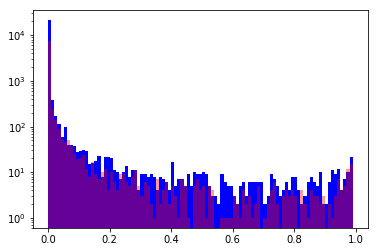

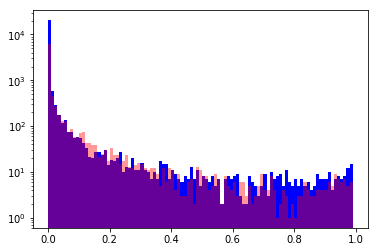

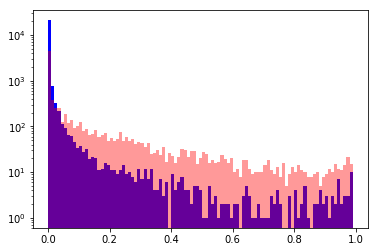

In [73]:
bins = np.arange(0,1,0.01)
dat = lofar_cat['Pval_res_250']
plt.hist(dat,bins=bins,log=True,color='blue')

dat = data_rerun_table['Pval_res_250']
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)

plt.show()

dat = lofar_cat['Pval_res_350']
plt.hist(dat,bins=bins,log=True,color='blue')

dat = data_rerun_table['Pval_res_350']
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)

plt.show()

dat = lofar_cat['Pval_res_500']
plt.hist(dat,bins=bins,log=True,color='blue')

dat = data_rerun_table['Pval_res_500']
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)

plt.show()

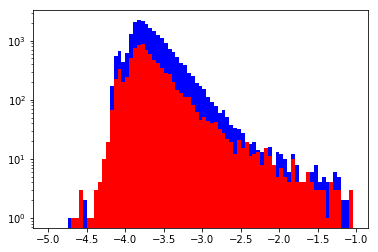

In [88]:
mask = ~np.isnan(lofar_cat['F_SPIRE_250'])
bins = np.arange(-5,-1,0.05)
dat = np.log10(lofar_cat['Peak_flux'][mask])
plt.hist(dat,bins=bins,log=True,color='blue')

dat = np.log10(lofar_cat['Peak_flux'][~mask])
plt.hist(dat,bins=bins,log=True,color='red')
plt.show()

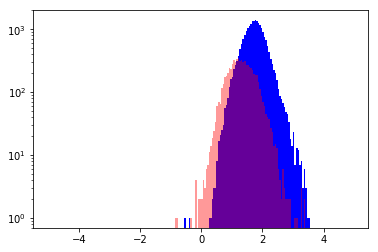

In [92]:
mask = ~np.isnan(lofar_cat['F_SPIRE_250'])
bins = np.arange(-5,5,0.05)
dat = np.log10(lofar_cat['ch1_swire_flux'][mask])
plt.hist(dat,bins=bins,log=True,color='blue')

dat = np.log10(lofar_cat['ch1_swire_flux'][~mask])
plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)
plt.show()

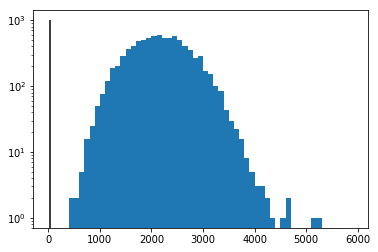

In [98]:
bins = np.arange(0,6000,100)
dat = data_rerun_table['n_eff_SPIRE_250']
plt.hist(dat,bins=bins,log=True)
plt.vlines(40,0,1000)
plt.show()

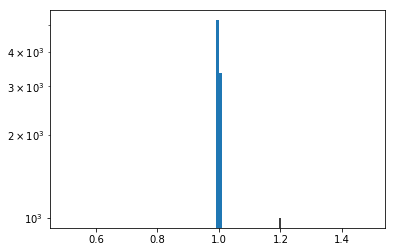

In [101]:
bins = np.arange(0.5,1.5,0.01)
dat = data_rerun_table['Rhat_SPIRE_250']
plt.hist(dat,bins=bins,log=True)
plt.vlines(1.2,0,1000)
plt.show()

In [328]:
len(lofar_xid_join)

31748

23179
8569


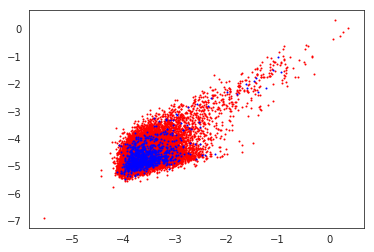

In [342]:
mask = lofar_xid_join['XID+_rerun']
bins = np.arange(0,5,0.1)

#plt.hist(dat,bins=bins,log=True,color='blue')
dist = cosmo.luminosity_distance(dat).to(u.m).value
rad = np.log10(lofar_xid_join['Total_flux'][~mask])
fir = np.log10(lofar_xid_join['F_SPIRE_250_1'][~mask])
y = rad-fir
print(len(y))
plt.scatter(rad,y,s=1,c='red')


#plt.hist(dat,bins=bins,log=True,color='red',alpha=0.4)
rad = np.log10(lofar_xid_join['Total_flux'][mask])
fir = np.log10(lofar_xid_join['F_SPIRE_250_1'][mask])
y = rad-fir
print(len(y))
plt.scatter(rad,y,s=1,c='blue')
plt.show()

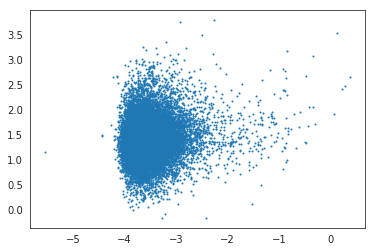

In [349]:
mask = ~lofar_xid_join['XID+_rerun']
x = np.log10(lofar_xid_join['Total_flux'][mask])
y = np.log10(lofar_xid_join['F_MIPS_24'][mask]/lofar_xid_join['F_SPIRE_250_1'][mask])
plt.scatter(x,y,s=1)
plt.show()

26328
6500


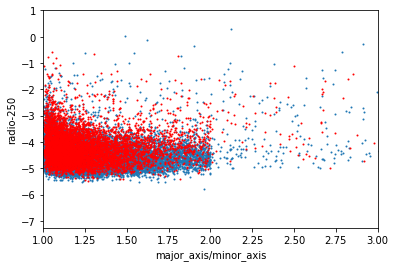

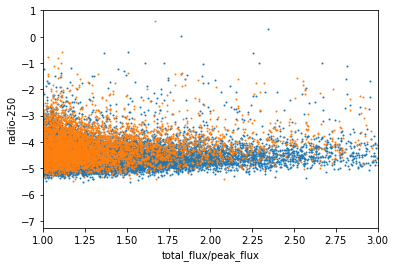

In [74]:
mask = ~lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Maj'][mask]/lofar_xid_join['Min'][mask]
print(len(x))
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_1'][mask])
plt.scatter(x,y,s=1)

mask = lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Maj'][mask]/lofar_xid_join['Min'][mask]
print(len(x))
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_2'][mask])
plt.scatter(x,y,s=1,c='red')

plt.xlim(1,3)
plt.xlabel('major_axis/minor_axis')
plt.ylabel('radio-250')
plt.show()

mask = ~lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Total_flux'][mask]/lofar_xid_join['Peak_flux'][mask]
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_1'][mask])
plt.scatter(x,y,s=1)

mask = lofar_xid_join['XID+_rerun']
x = lofar_xid_join['Total_flux'][mask]/lofar_xid_join['Peak_flux'][mask]
y = np.log10(lofar_xid_join['Total_flux'][mask]/lofar_xid_join['F_SPIRE_250_2'][mask])
plt.scatter(x,y,s=1)

plt.xlim(1,3)
plt.xlabel('total_flux/peak_flux')
plt.ylabel('radio-250')
plt.show()

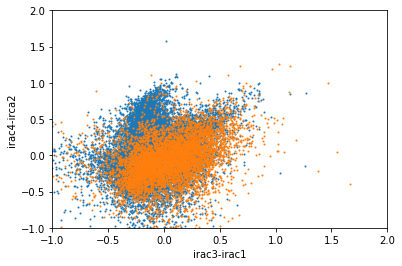

In [75]:
mask = ~np.isnan(lofar_cat['F_SPIRE_250']) #& (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
plt.scatter(c1,c2,s=1)

mask = np.isnan(lofar_cat['F_SPIRE_250']) #& (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
z_col = lofar_cat['z1_median'][mask]
z_bins = np.arange(0,4,0.5)
z_binned = np.digitize(z_col,z_bins)
#plt.scatter(c1[0],c2[0],s=100,c='red')
plt.scatter(c1,c2,s=1)
#plt.scatter(c1[0],c2[0],s=10,c='red')
#plt.scatter(c1[0],c2[0],s=1,c=z_binned[0])


plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel('irac3-irac1')
plt.ylabel('irac4-irca2')
#plt.title('{} < z < {}'.format(z_bins[n],z_bins[n+1]))
plt.show()

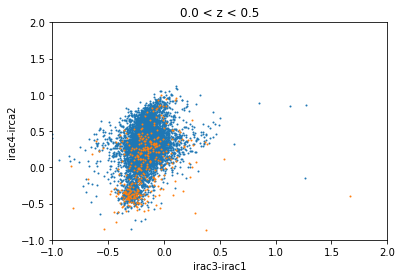

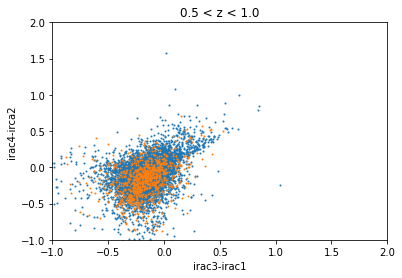

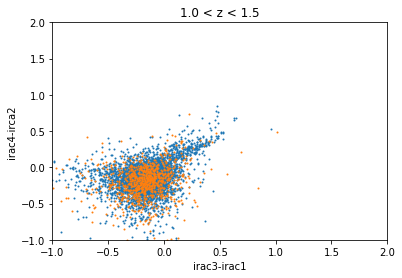

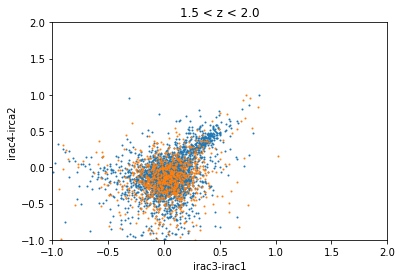

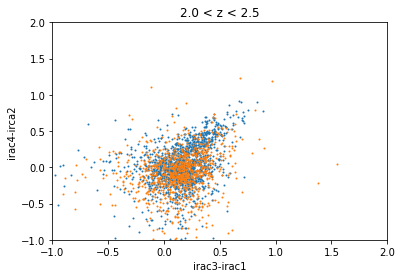

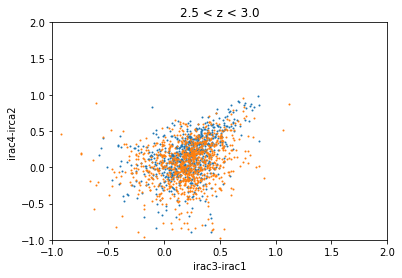

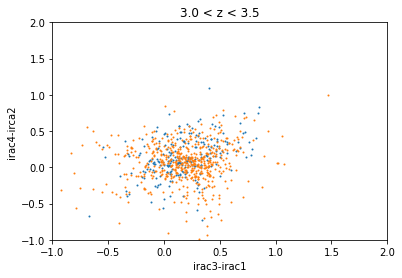

In [76]:
z_bins = np.arange(0,4,0.5)
dist = cosmo.luminosity_distance(lofar_cat['z1_median']).to(u.m).value
ch1_lum = lofar_cat['ch1_swire_flux']*4*np.pi*dist**2
ch2_lum = lofar_cat['ch2_swire_flux']*4*np.pi*dist**2
ch3_lum = lofar_cat['ch3_swire_flux']*4*np.pi*dist**2
ch4_lum = lofar_cat['ch4_swire_flux']*4*np.pi*dist**2
for n in range(len(z_bins)-1):
    mask = ~np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
    c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
    plt.scatter(c1,c2,s=1)

    mask = np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(lofar_cat['ch3_swire_flux'][mask]/lofar_cat['ch1_swire_flux'][mask])
    c2 = np.log10(lofar_cat['ch4_swire_flux'][mask]/lofar_cat['ch2_swire_flux'][mask])
    z_col = lofar_cat['z1_median'][mask]
    z_bins = np.arange(0,4,0.5)
    z_binned = np.digitize(z_col,z_bins)
#plt.scatter(c1[0],c2[0],s=100,c='red')
    plt.scatter(c1,c2,s=1)
#plt.scatter(c1[0],c2[0],s=10,c='red')
#plt.scatter(c1[0],c2[0],s=1,c=z_binned[0])


    plt.xlim(-1,2)
    plt.ylim(-1,2)
    plt.xlabel('irac3-irac1')
    plt.ylabel('irac4-irca2')
    plt.title('{} < z < {}'.format(z_bins[n],z_bins[n+1]))
    plt.show()

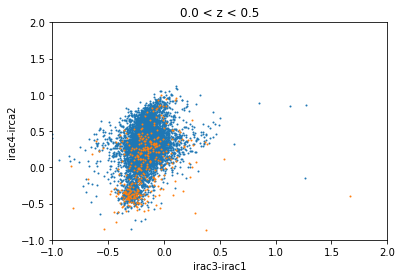

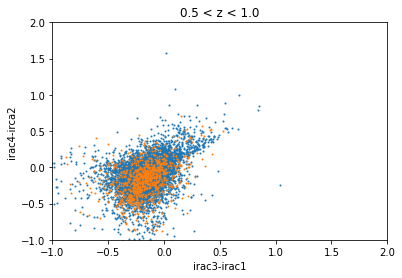

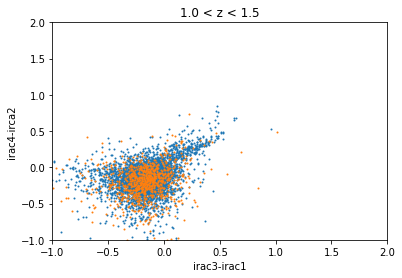

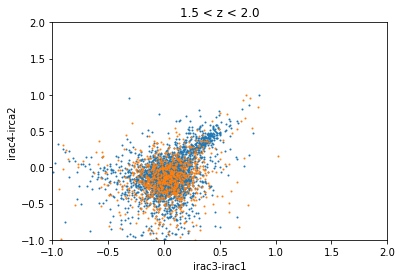

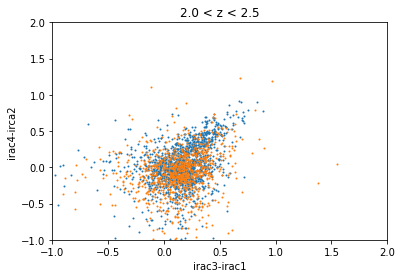

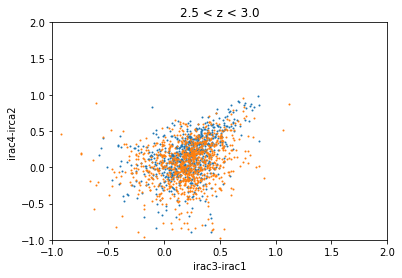

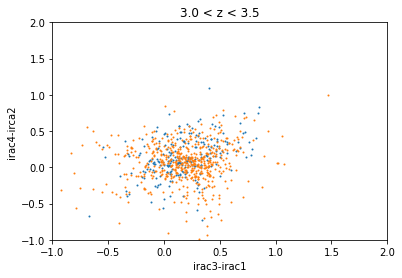

In [31]:
z_bins = np.arange(0,4,0.5)
dist = cosmo.luminosity_distance(lofar_cat['z1_median']).to(u.m).value
ch1_lum = lofar_cat['ch1_swire_flux']*4*np.pi*dist**2
ch2_lum = lofar_cat['ch2_swire_flux']*4*np.pi*dist**2
ch3_lum = lofar_cat['ch3_swire_flux']*4*np.pi*dist**2
ch4_lum = lofar_cat['ch4_swire_flux']*4*np.pi*dist**2
for n in range(len(z_bins)-1):
    mask = ~np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(ch3_lum[mask]/ch1_lum[mask])
    c2 = np.log10(ch4_lum[mask]/ch2_lum[mask])
    plt.scatter(c1,c2,s=1)

    mask = np.isnan(lofar_cat['F_SPIRE_250']) & (lofar_cat['z1_median']>z_bins[n]) & (lofar_cat['z1_median']<z_bins[n+1])
    c1 = np.log10(ch3_lum[mask]/ch1_lum[mask])
    c2 = np.log10(ch4_lum[mask]/ch2_lum[mask])
    z_col = lofar_cat['z1_median'][mask]
    z_bins = np.arange(0,4,0.5)
    z_binned = np.digitize(z_col,z_bins)
#plt.scatter(c1[0],c2[0],s=100,c='red')
    plt.scatter(c1,c2,s=1)
#plt.scatter(c1[0],c2[0],s=10,c='red')
#plt.scatter(c1[0],c2[0],s=1,c=z_binned[0])


    plt.xlim(-1,2)
    plt.ylim(-1,2)
    plt.xlabel('irac3-irac1')
    plt.ylabel('irac4-irca2')
    plt.title('{} < z < {}'.format(z_bins[n],z_bins[n+1]))
    plt.show()